# Biases in online labor markets: A systematic review

Gerit Wagner, Julian Prester, Roman Lukyanenko, Guy Paré

Building on the C5-DM framework for data management in literature reviews \[@WagnerEtAl2026\], this vignette illustrates how data management principles can be implemented in an literature review. The framework foregrounds data conceptualization, collection, curation, control, and consumption as foundational activities that shape the transparency, reliability, and reuse of literature review outcomes. The vignette is organized into two complementary parts. The middle column presents a systematic literature review following established reporting conventions. The right column explains how the manuscript is internally grounded in explicit data management decisions aligned with the C5-DM framework, adding an interactive layer of annotations that makes these decisions visible. The vignette thus serves as a concrete illustration of good data management practice in literature reviews—one that readers can follow directly in their own work while also sharpening their understanding of what to look for when evaluating other software solutions and data management approaches.

> **5C-DM Framework**
>
> This column explains how the prinicples of the framework are implemented. ⬇️
>
> <!-- Click on the buttons for an explanation. -->

## Plan

The review is conducted using a <a href="https://github.com/fs-ise/C5-DM-vignette" target="_blank">shared GitHub repository</a>, which was be synchronized locally by the team.

<a href="curate-info.html"
   target="_blank" rel="noopener noreferrer"
   aria-label="Open Curate info (opens in a popup window)"
   style="text-decoration:none;"
   onclick="const w=window.open(this.href,'curatePopup','popup=yes,width=900,height=700');
            if(w){ w.focus(); return false; }"> <span style="
      display:inline-flex; align-items:center; gap:.35rem;
      padding:.18rem .6rem;
      border-radius:999px;
      border:1px solid #fbbf24;
      background:#fef3c7;
      color:#92400e;
      font-size:.85em;
      font-weight:700;
      cursor:pointer;
      user-select:none;

      box-shadow: 0 1px 0 rgba(0,0,0,.05), 0 0 0 2px rgba(59,130,246,.18);
      transition: transform .12s ease, box-shadow .12s ease, filter .12s ease;
    " onmouseenter="this.style.transform='translateY(-1px)'; this.style.boxShadow='0 2px 0 rgba(0,0,0,.05), 0 0 0 3px rgba(59,130,246,.32)'; this.style.filter='brightness(0.98)';" onmouseleave="this.style.transform=''; this.style.boxShadow='0 1px 0 rgba(0,0,0,.05), 0 0 0 2px rgba(59,130,246,.18)'; this.style.filter='';"> Curate: <span aria-hidden="true" style="font-size:1em; opacity:.85;">Storing data in a version-controlled folder. ↗</span> </span> </a>

## Search

We specified search strategies for the DBLP and Crossref application programming interfaces (APIs)[1] using the core keyword *microsourcing* and a set of semantically related synonyms. We also reused samples from prior reviews \[@WagnerPresterPare2021;@Fiers2023\]. The resulting query formulations were systematically tabulated to document the conceptual scope of the search and to enable consistent execution across data sources (see @tbl-search-overview).

``` python
import json
from pathlib import Path
from urllib.parse import quote

SEARCH_DIR = Path("/home/gerit/ownCloud/action-office/LRDM/C5-DM-vignette/data/search")

def md_link(text: str, target_path: str) -> str:
    target_path_posix = Path(target_path).as_posix()
    url = target_path_posix
    return f"[{text}]({url})"


json_files = sorted(SEARCH_DIR.glob("*.json"))

rows = []
for jf in json_files:
    try:
        data = json.loads(jf.read_text(encoding="utf-8"))
    except Exception:
        continue

    label = (data.get("label") or jf.stem).strip()
    results_path = (data.get("search_results_path") or "").strip()

    # Render links in the same "data/search/..." style as in your manual table
    json_link_target = f"data/search/{jf.name}"
    search_strategy_cell = md_link(jf.name, json_link_target)

    search_results_cell = (
        md_link(Path(results_path).name, results_path)
        if results_path
        else ""
    )

    rows.append((label, search_strategy_cell, search_results_cell))

print("::: {#tbl-search-overview}")
print("Table: Overview of search strategies and results.\n")
print("| Source | Search strategy | Search results |")
print("|:--------|:-----------------|:----------------|")
for s, strat, res in rows:
  print(f"| {s} | {strat} | {res} |")
print("\n:::")
```

| Source | Search strategy | Search results |
|:---|:---|:---|
| Prior review: @Fiers2023 | [Fiers2023_search_history.json](data/search/Fiers2023_search_history.json) | [Fiers2023.csv](data/search/Fiers2023.csv) |
| Prior review: @WagnerPresterPare2021 | [WagnerPresterPare2021_search_history.json](data/search/WagnerPresterPare2021_search_history.json) | [WagnerPresterPare2021.bib](data/search/WagnerPresterPare2021.bib) |
| Crossref (API search) | [crossref_search_history.json](data/search/crossref_search_history.json) | [crossref.bib](data/search/crossref.bib) |
| DBLP (API search) | [dblp_search_history.json](data/search/dblp_search_history.json) | [dblp.bib](data/search/dblp.bib) |

[1] For the illustration, we relied on open-access API-searches, because licensing issues do not allow for publication of raw data exported from databases like WOS or EBSCO.

The search strategie are stored in JSON format together with the raw data files in the <a href="https://github.com/fs-ise/C5-DM-vignette/tree/main/data/search" target="_blank">data/search</a> directory, in line with the standard of @HaddawayRethlefsenDaviesEtAl2022.

Record metadata is curated as follows:

-   Data retrieved in the search is stored in the <a href="https://github.com/fs-ise/C5-DM-vignette/tree/main/data/search" target="_blank">data/search</a> directory; the <a href="https://github.com/fs-ise/C5-DM-vignette/commits/main/data/search" target="_blank">Git history of this path</a> shows that the files were preserved in their original form, i.e., treated as raw data
-   Records were imported into the <a href="https://github.com/fs-ise/C5-DM-vignette/blob/main/data/records.bib" target="_blank">data/records.bib</a> as the primary data structure; the <a href="https://github.com/fs-ise/C5-DM-vignette/commits/main/data/records.bib" target="_blank">Git history of this file</a> documents how each record evolved through the process (e.g., manual or computational change of metadata, merging of records, prescreening decisions)

For primary data (record metadata), the Bibtex format was chosen and consistent formatting was ensured by CoLRev \[@WagnerPrester2025\]. BibTex is machine readable and the changes can easily be interpreted when inspecting the git history.

> **Explanation**
>
> Data was structured as follows:
>
> <figure>
> 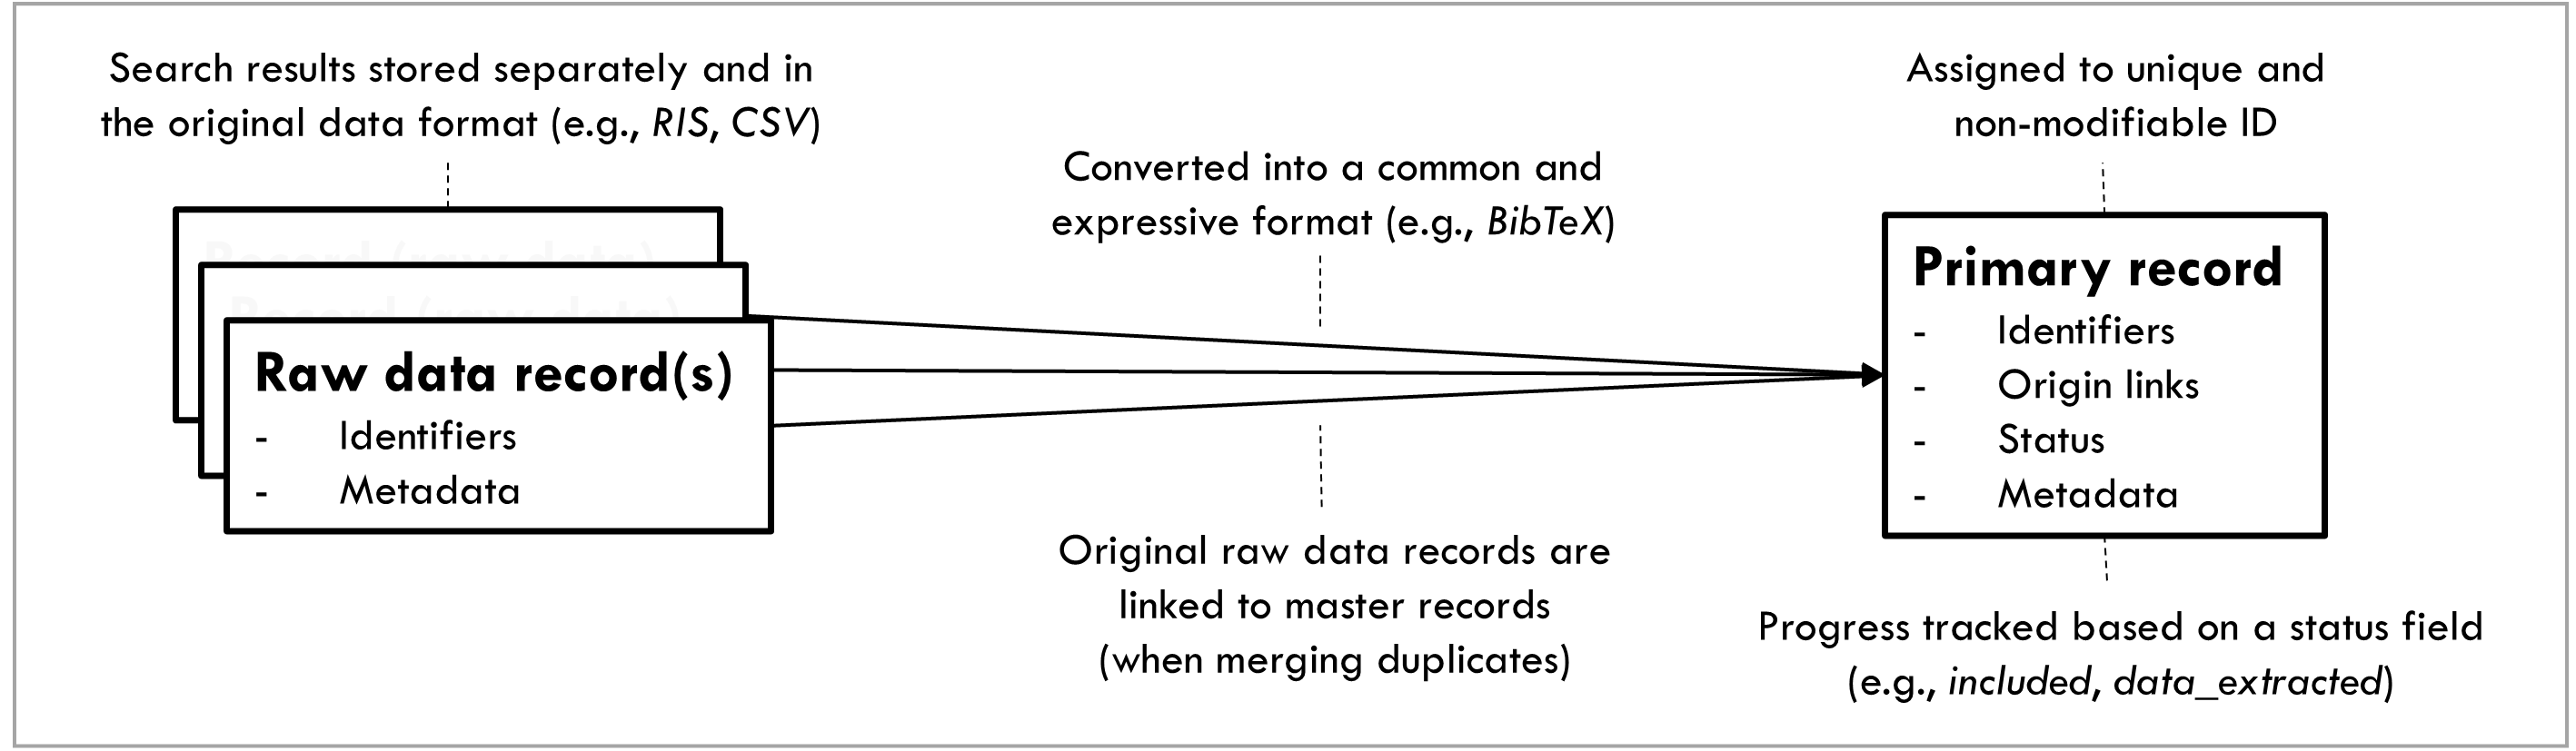
> <figcaption aria-hidden="true">Data structures</figcaption>
> </figure>

> **TODO**
>
> -   Search-query was used to validate syntactic correctness and …
> -   scope (????)

## Dedupe

Metadata was prepared using CoLRev and extensions (see <a href="https://github.com/fs-ise/C5-DM-vignette/commit/051e115fff389f209afb9a4fbe77e6a33271264c" target="_blank">prep commit</a>).

Deduplication was done using BibDedupe \[@Wagner2024\]. Deduplication changes are in <a href="https://github.com/fs-ise/C5-DM-vignette/commit/c22178d10fb90954d681f428fc5b08c72b5e6d48" target="_blank">dedupe commit</a>.

> **TODO**
>
> Dedupe changes were validated using the max-diff strategy (`colrev validate XXXX`). Preparation changes were validated using the max-diff strategy (`colrev validate XXXX`).

## Prescreen

> **Manual task**
>
> **Trigger:** `records_deduped.bib` updated  
> **Responsible:** Two independent coders (GW anmd JP)  
> **Protocol:** PRISMA TA screening rules (see `protocol/screening.md`)  
> **Expected output:** `records_screened.bib` **History filter:** TODO (e.g., “prescreen” in commit title)

> **TODO**
>
> Replace this figure:
>
> <figure>
> 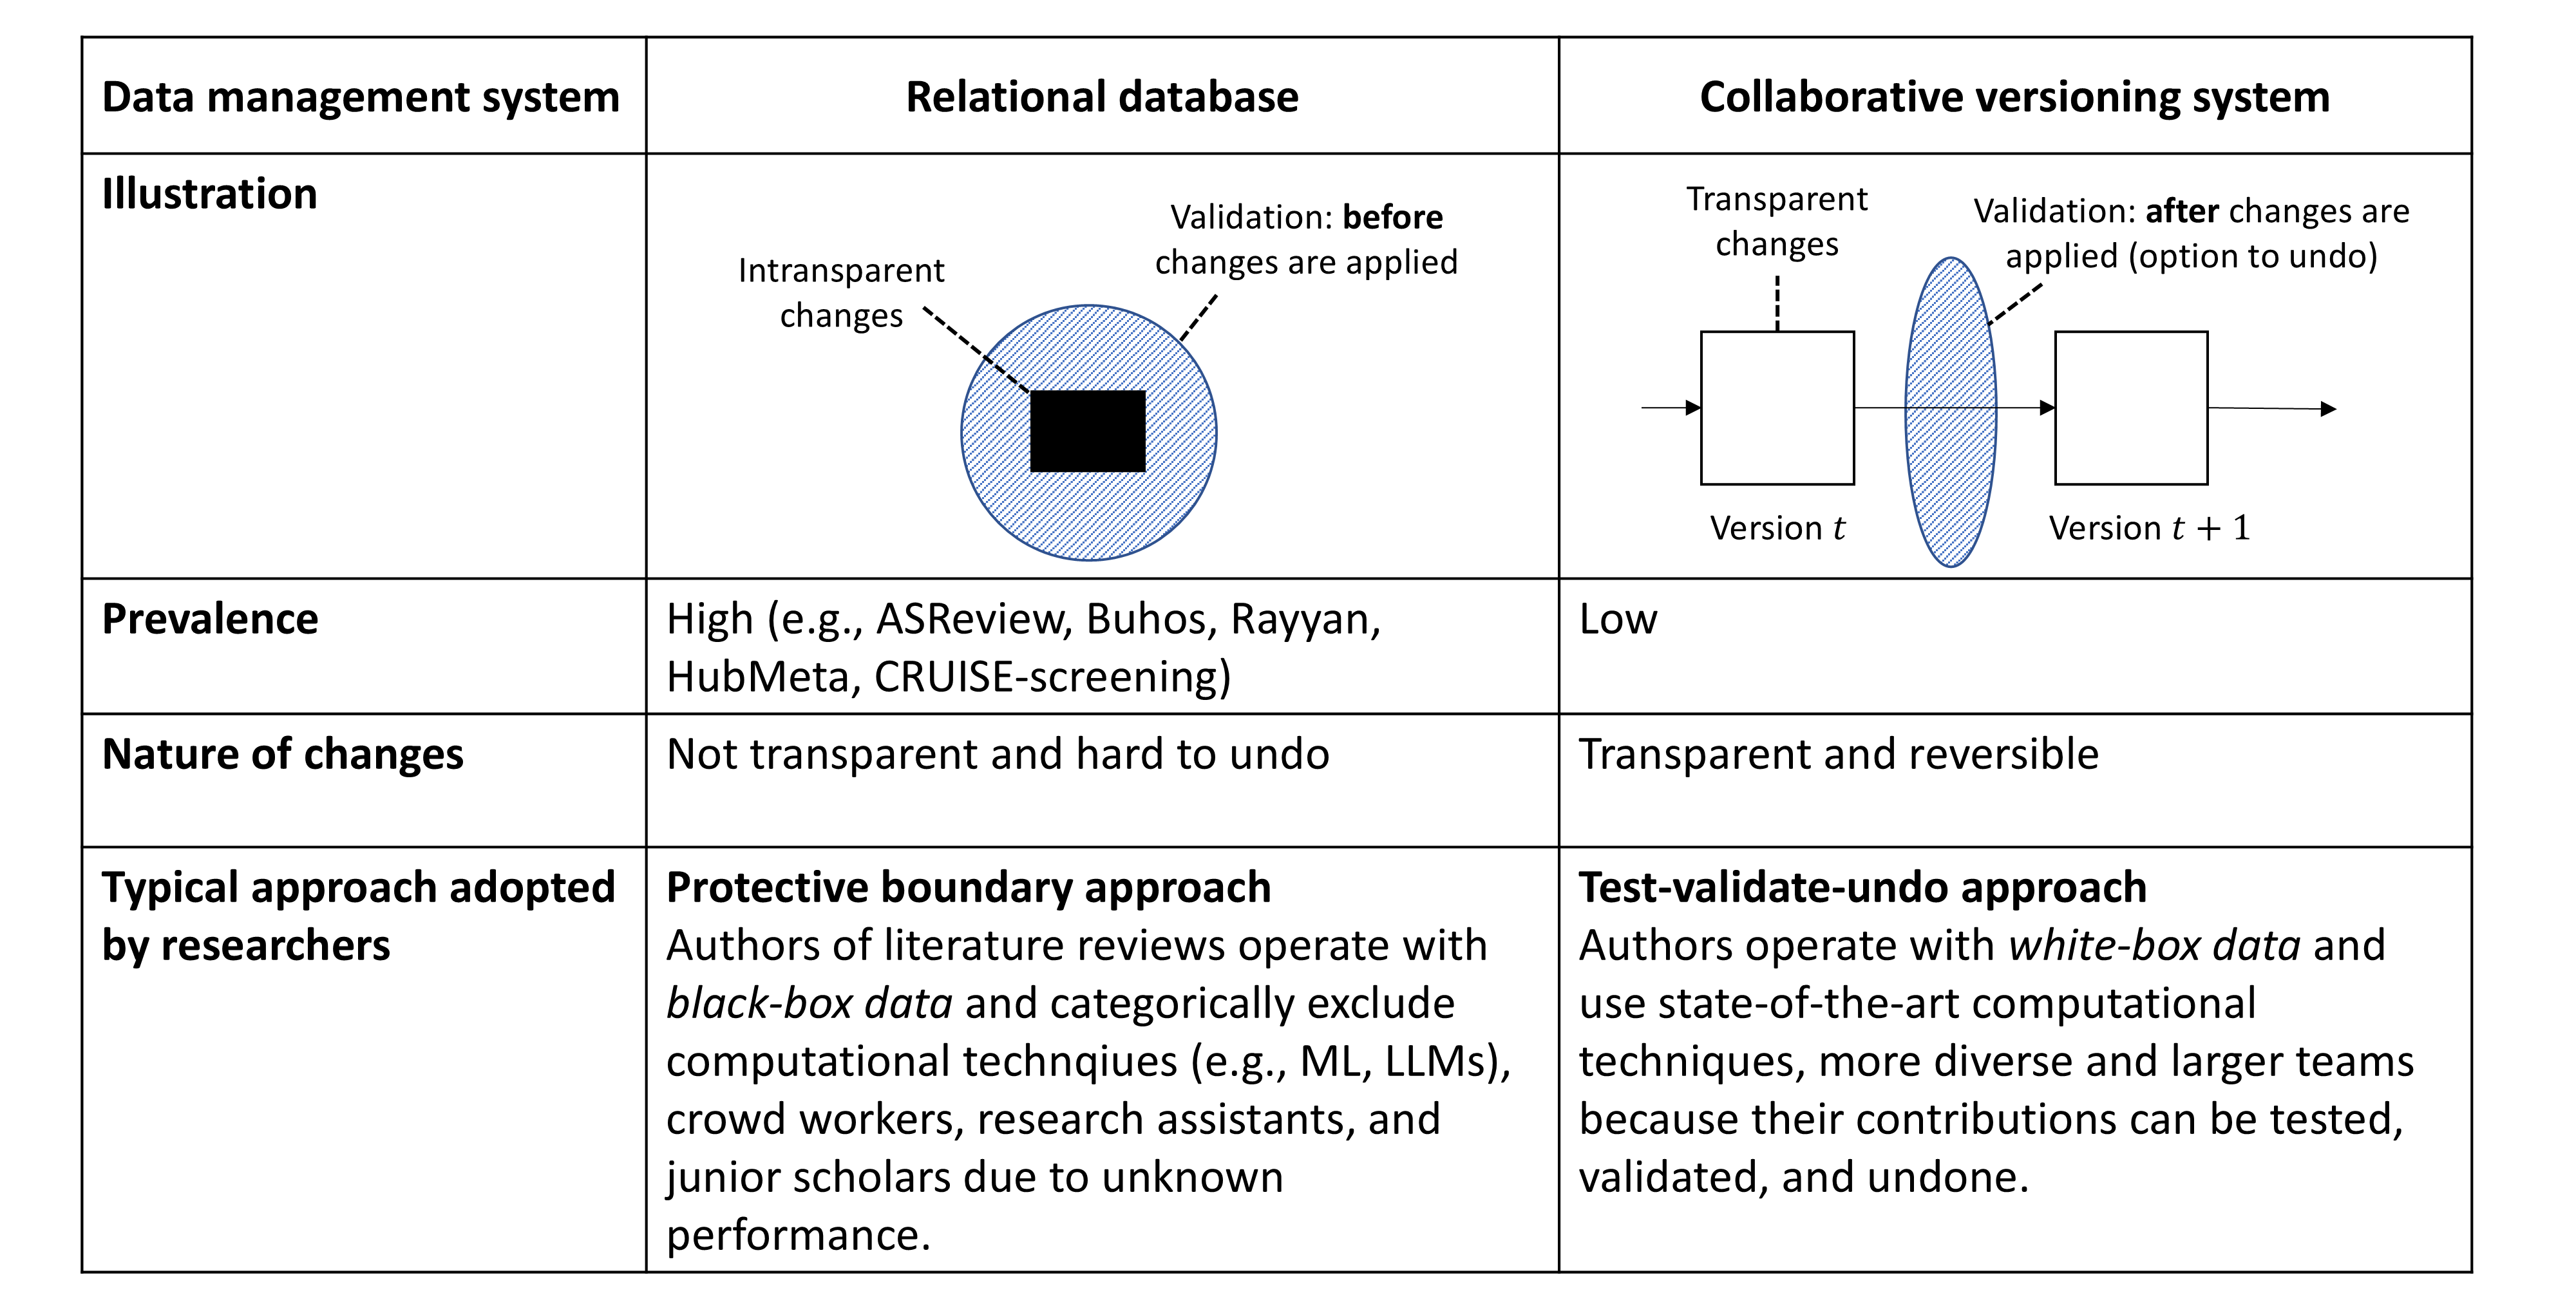
> <figcaption aria-hidden="true">Data structures</figcaption>
> </figure>
>
> -   For prescreening, we tested the new <a href="temp_file.txt" target="_blank">llm-prescreener</a> in <a href="temp_file.txt" target="_blank">ref</a>. Comparison with prescreening decisions of GW showed low reliability with the llm-prescreener (command + kappa). Results were therefore reverted ([ref](temp_file.txt)) and a fully manual prescreen was implemented.
>
> Note: this could also be done in a separate branch, or the changes could be undone using a hard git reset.
>
> -   Screen: fulltext documents were shared in a protected drive (link to Dropbox)

## Data extraction

In line with the methodology of systematic reviews \[**REFS**\], we selected structured data forms to extract evidence from the studies (a preliminary coding scheme is <a href="temp_file.txt" target="_blank">TODO</a> and the pilot coding <a href="temp_file.txt" target="_blank">TODO</a>). Data is extracted [here](data).

> **Other review methodologies**
>
> For other review methodologies, different data extraction approaches must be considered. The following examples were added for illustration purposes:
>
> -   Bibliometric data (<a href="temp_file.txt" target="_blank">TODO</a>).
> -   Emergent coding (<a href="temp_file.txt" target="_blank">TODO</a>) in line with the recommendations of @GioiaEtAl2013 and the YAML workflow of @Wang2022. <!--
>     https://aisel.aisnet.org/acis2022/17/
>     https://blairwang.b-cdn.net/attachments/ACIS2022-YAML-Slides-rev02.pdf
>     -->

> **Explanation**
>
> In line with recommendation XY, data structures range from unstructured to structured; they should be aligned with the type of review.
>
> <figure>
> 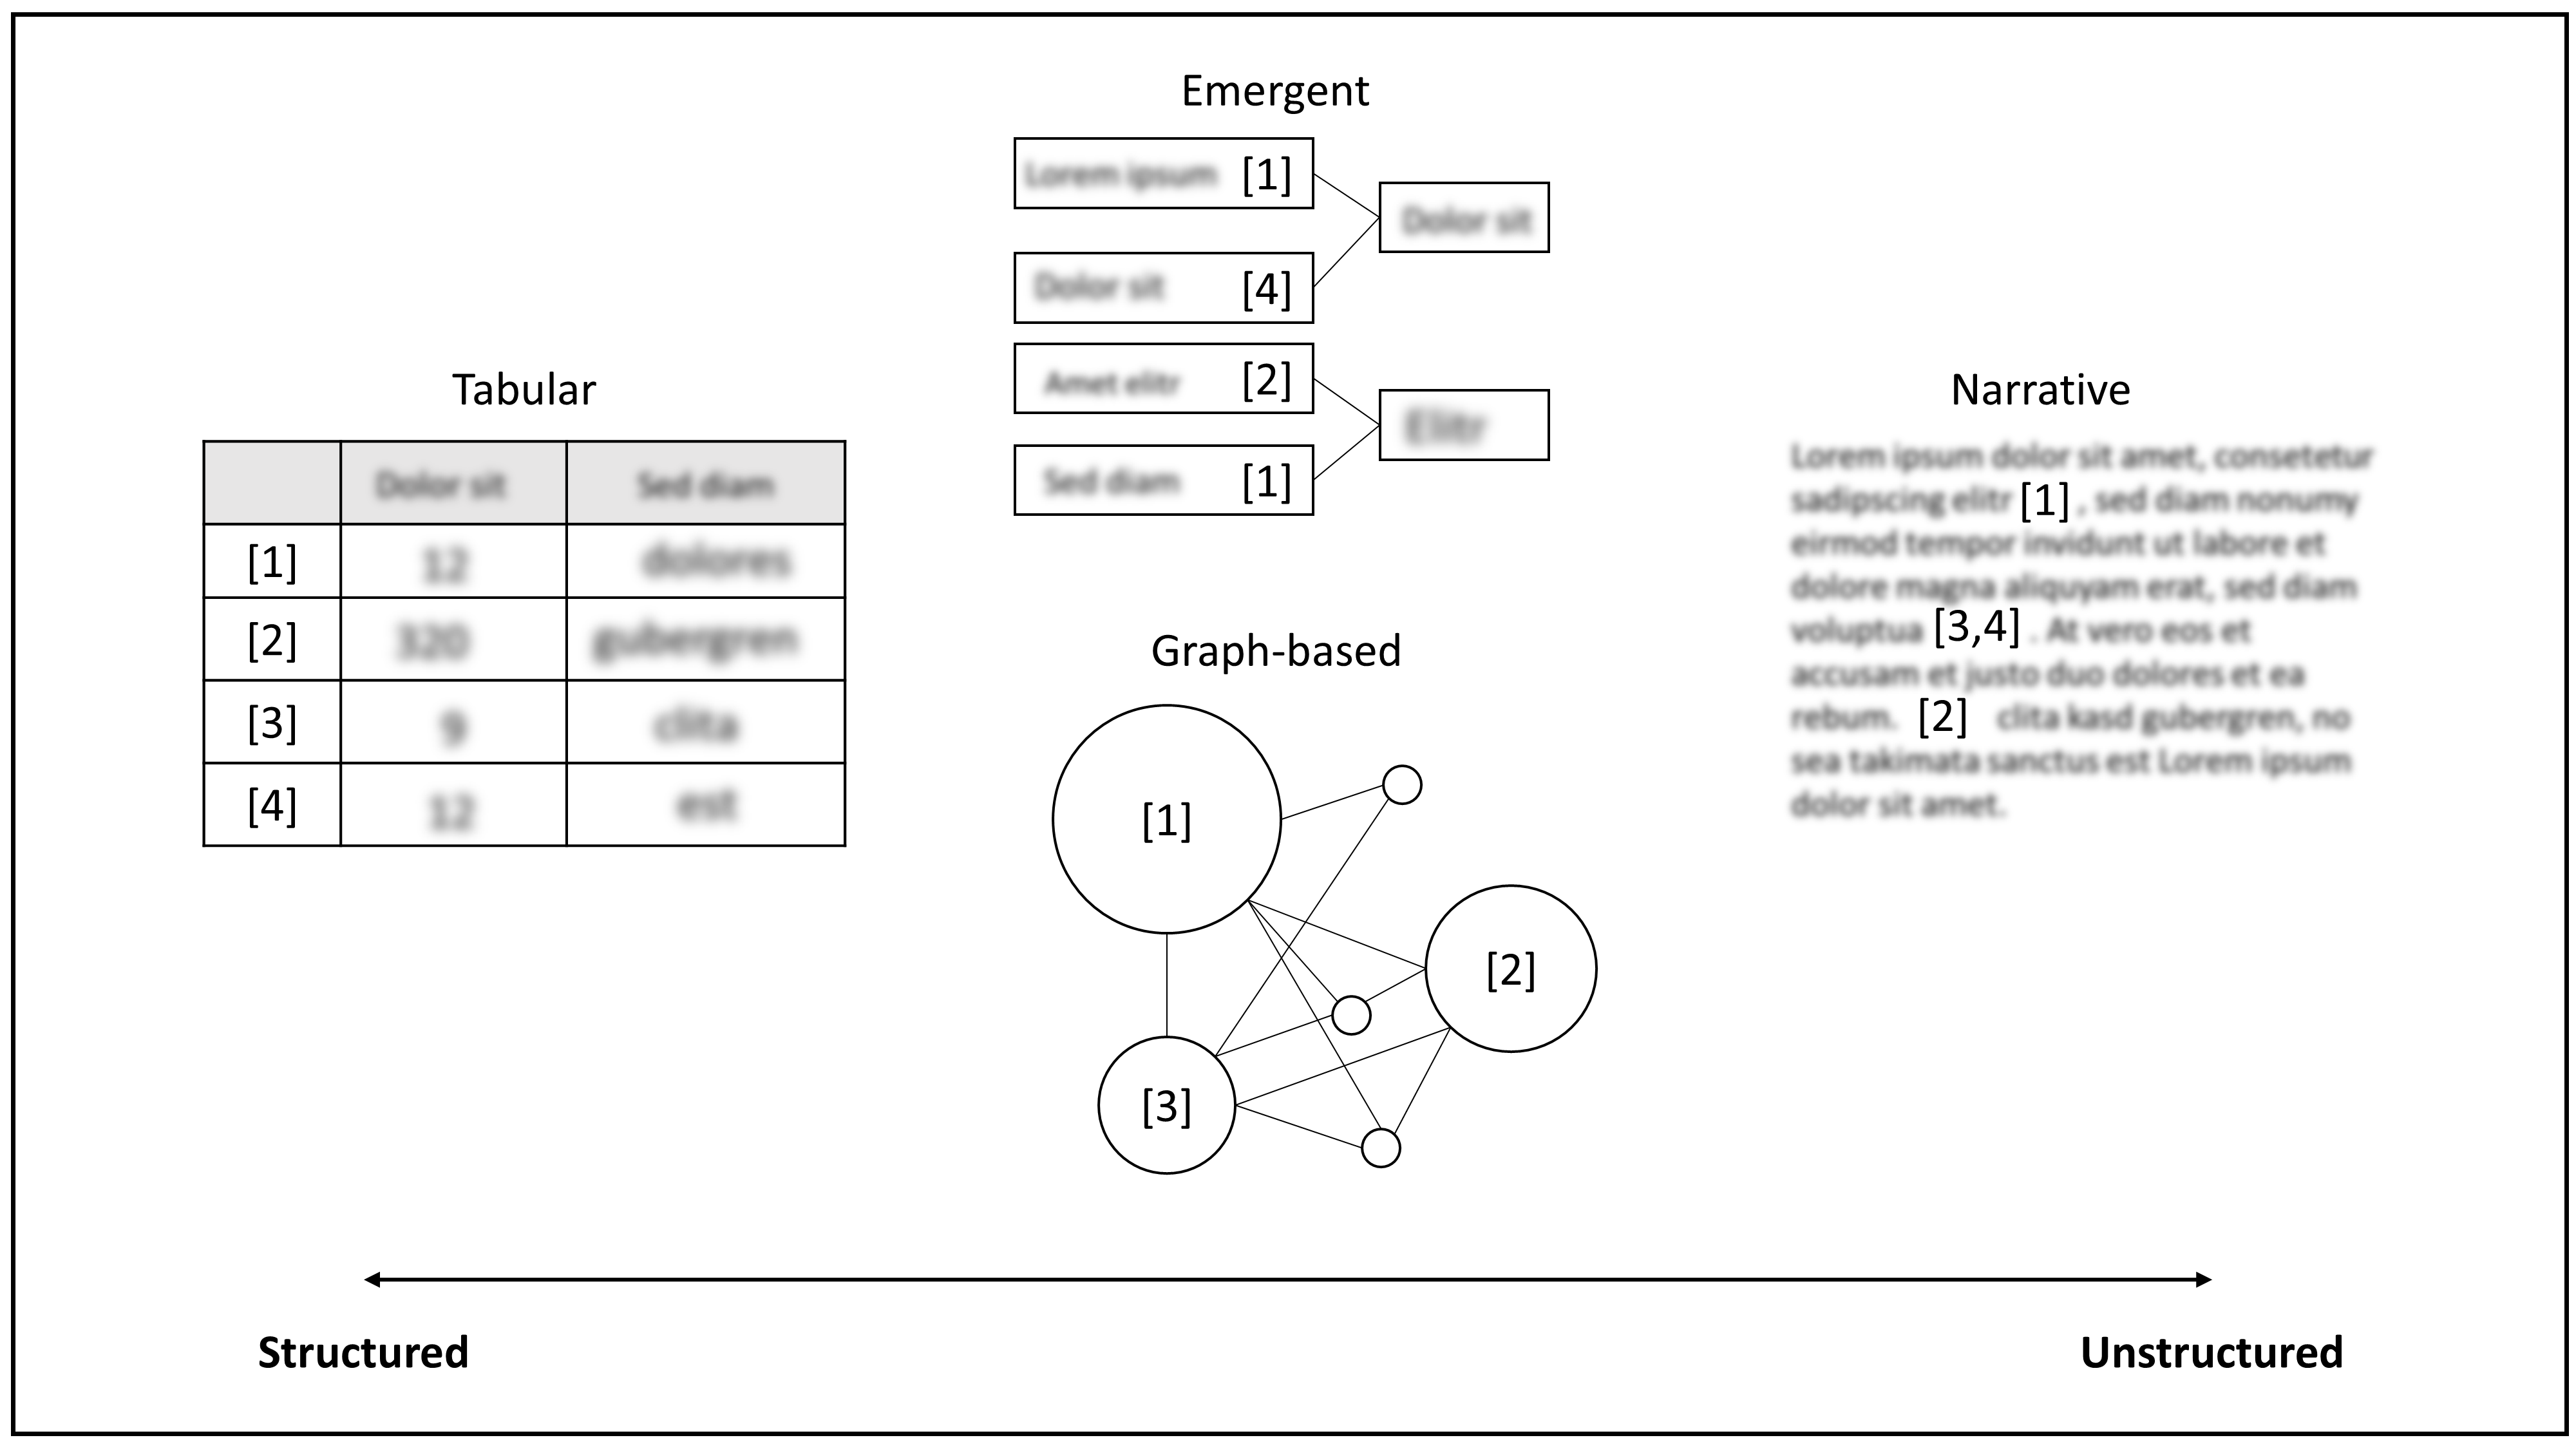
> <figcaption aria-hidden="true">Data structures</figcaption>
> </figure>

## Synthesis

The narrative synthesis is in the <a href="https://github.com/fs-ise/C5-DM-vignette/blob/main/data/data/paper.md" target="_blank">paper document</a> in Markdown format, allowing for larger teams to work on the same document (similar to the [covid19-review](https://github.com/greenelab/covid19-review)).

To make the review reusable, we added the [CC BY 4.0](https://github.com/fs-ise/C5-DM-vignette/blob/main/LICENSE.txt) license[1].

The current status of the project is automatically updated with every change and reflected in the PRISMA chart \[@PageMcKenzieBossuytEtAl2021\]:

[1] Indexing in SYNERGY, SearchRXiv is planned once the review progresses beyond the *illustration* stages.

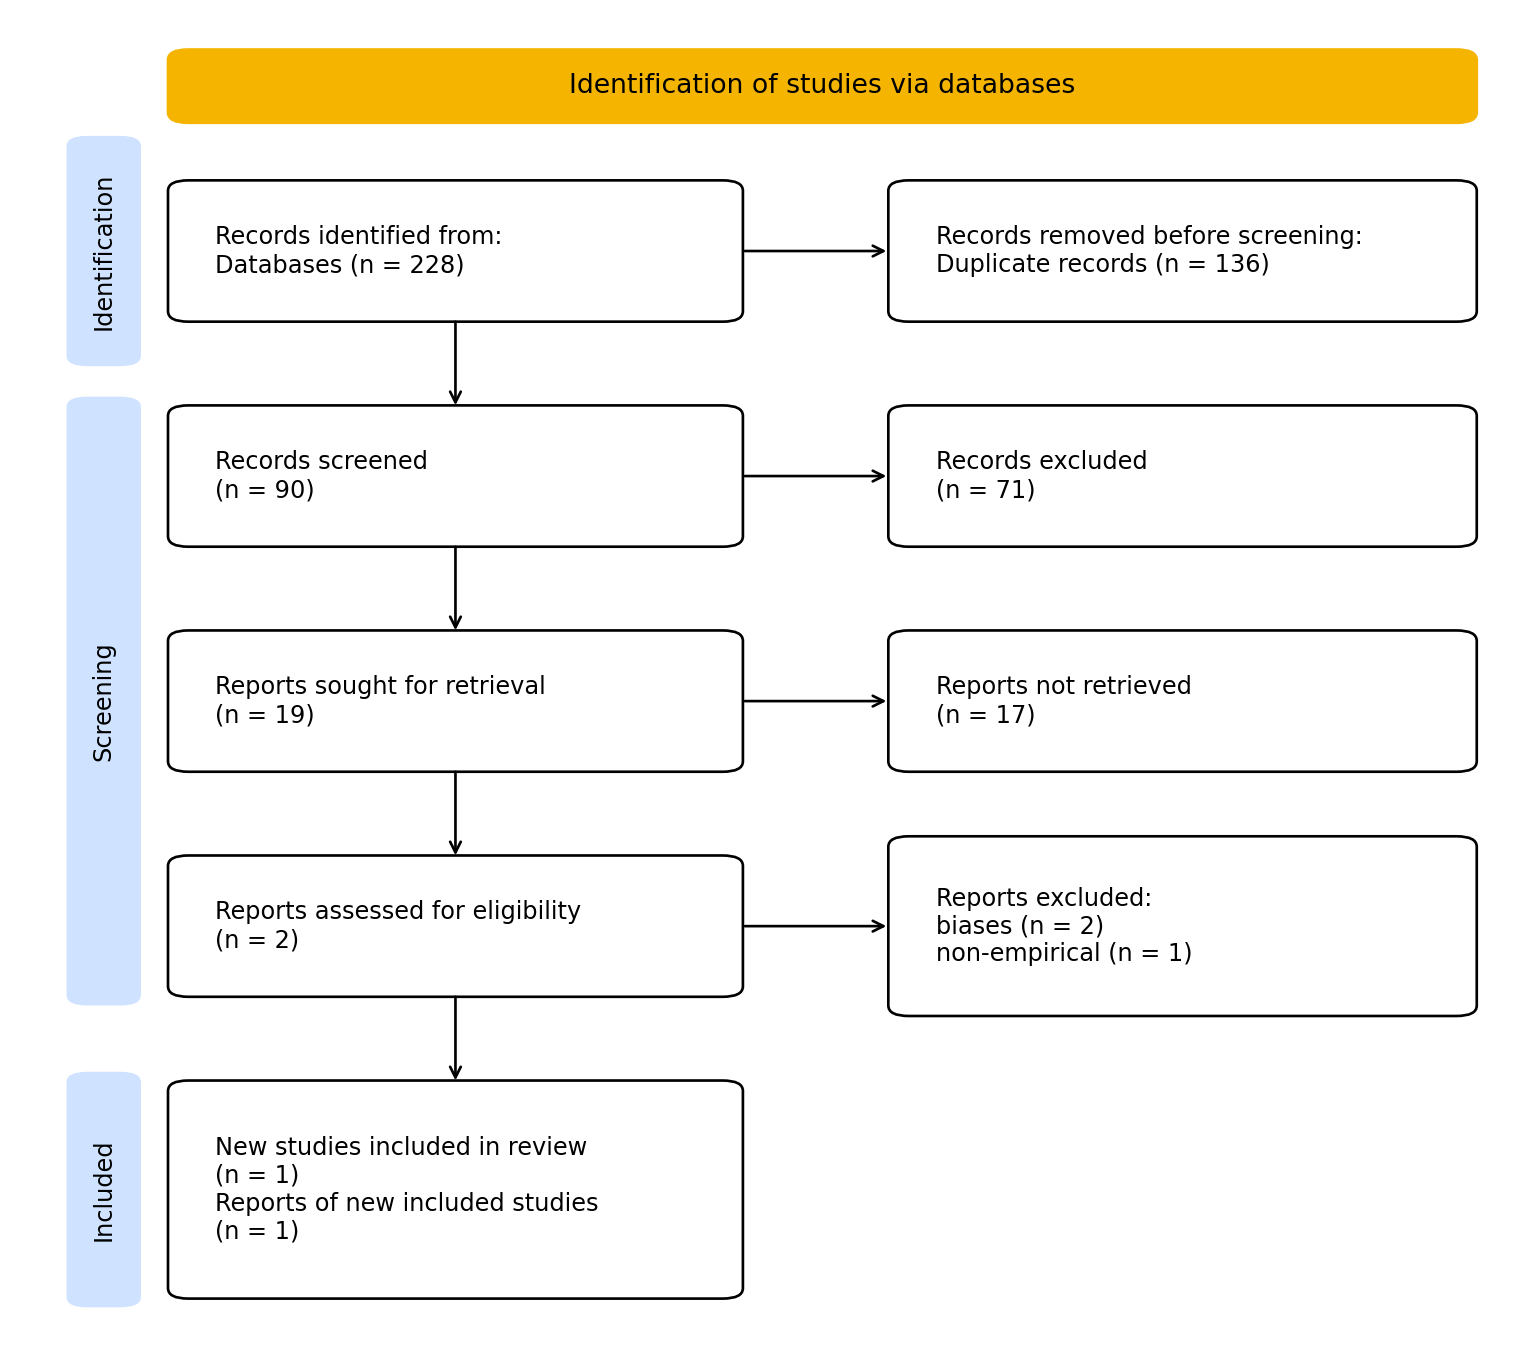

In [2]:
from py_prisma import plot_prisma_from_records

plot_prisma_from_records(records_path="/home/gerit/ownCloud/action-office/LRDM/C5-DM-vignette/data/records.bib", show=True)

> **TODO**
>
> The PRISMA chart is generated but needs to be tested properly.

@tbl-evidence provides summary of extracted evidence.

In [3]:
from pathlib import Path
import yaml
import pandas as pd
import matplotlib.pyplot as plt

yaml_path = Path("data/evidence_platform_work_biases.yml")

with yaml_path.open("r", encoding="utf-8") as f:
    doc = yaml.safe_load(f)

df = pd.DataFrame(doc.get("papers", []))

cols = [
    "study_id", "citation_key", "year", "platform", "platform_type",
    "method", "data", "sample",
    "bias_type", "bias_mechanism",
    "outcome_affected", "evidence_level", "direction_of_bias",
    "key_result", "notes",
]
df = df[[c for c in cols if c in df.columns]]

df["year"] = pd.to_numeric(df.get("year"), errors="coerce").astype("Int64")
df = df.sort_values(["bias_type", "evidence_level", "year"], na_position="last").reset_index(drop=True)

compact_cols = [
    "citation_key", "platform_type", "bias_type", "evidence_level",
    "outcome_affected", "key_result"
]
df_compact = df[compact_cols].rename(columns={"citation_key": "study"})
df_compact

@fig-aggregated-evidence aggregates the evidence.

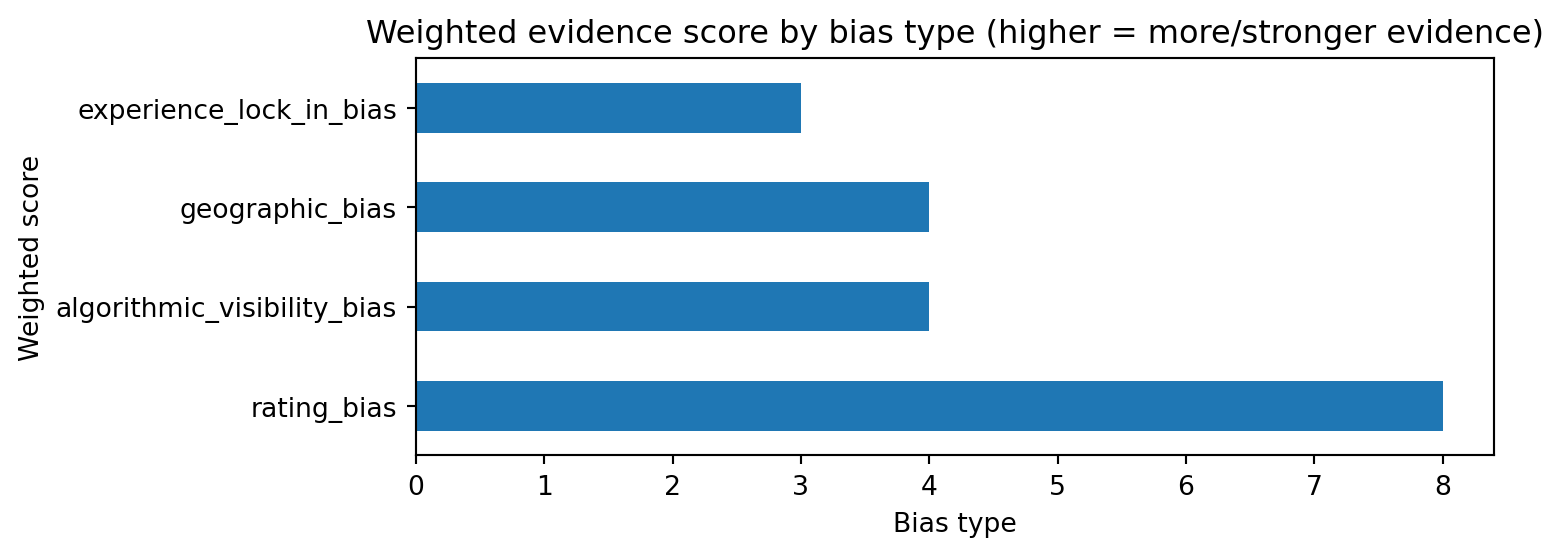

In [4]:
weights = {
    "weak": 1,
    "moderate": 2,
    "moderate_to_strong": 3,
    "strong": 4
}

df_w = df.copy()
df_w["evidence_weight"] = df_w["evidence_level"].map(weights).fillna(0)

score = (
    df_w.groupby("bias_type")["evidence_weight"]
        .sum()
        .sort_values(ascending=False)
)

ax = score.plot(kind="barh", figsize=(8, 3))
ax.set_title("Weighted evidence score by bias type (higher = more/stronger evidence)")
ax.set_xlabel("Bias type")
ax.set_ylabel("Weighted score")
plt.tight_layout()
plt.show()

## Other review methodologies

For other review methodologies, different data analysis approaches must be considered. The following examples were added for illustration purposes:

-   A bibliometric analysis:

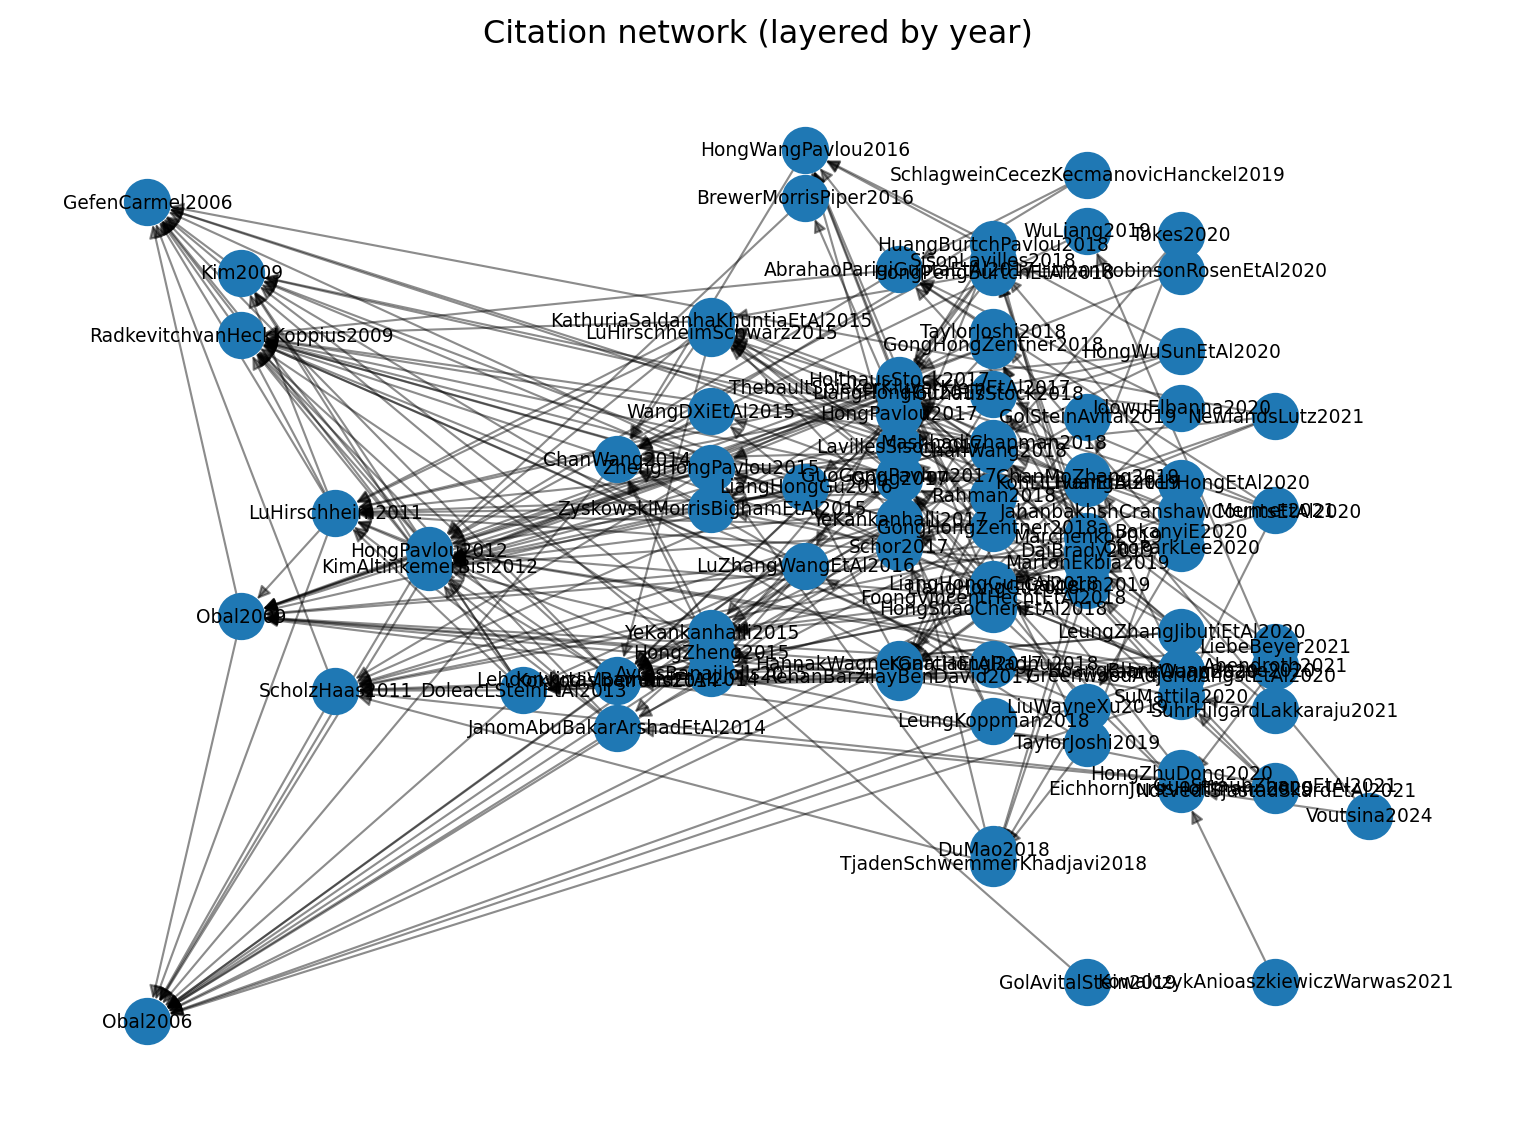

In [5]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

csv_path = Path("data/citation_edges.csv")
df = pd.read_csv(csv_path)

G = nx.from_pandas_edgelist(
    df,
    source="citing",
    target="cited",
    create_using=nx.DiGraph()
)

years = {}
years.update(dict(zip(df["citing"], df["citing_year"])))
years.update(dict(zip(df["cited"], df["cited_year"])))
nx.set_node_attributes(G, years, "year")

pos = nx.spring_layout(G, seed=7, k=0.6)

year_attr = nx.get_node_attributes(G, "year")

years_sorted = sorted({y for y in year_attr.values() if y is not None})
year_to_x = {y: i for i, y in enumerate(years_sorted)}

pos2 = nx.spring_layout(G, seed=7, k=0.6)
for n in G.nodes:
    y = year_attr.get(n)
    if y is not None:
        pos2[n][0] = year_to_x[y]

plt.figure(figsize=(8, 6))
nx.draw_networkx_edges(G, pos2, arrows=True, arrowstyle="-|>", arrowsize=10, width=0.8, alpha=0.45)
nx.draw_networkx_nodes(G, pos2, node_size=280)
nx.draw_networkx_labels(G, pos2, font_size=7)
plt.title("Citation network (layered by year)")
plt.axis("off")
plt.tight_layout()
plt.show()

-   A mapping (in line with scoping reviews **TODO: link to data in caption**)

<figure class=''>

<pre class="mermaid mermaid-js">mindmap
  root((Platform economy research topics))
    Bias, Discrimination, and Inequality
      Gender pay gaps &amp; wage inequality
      Racial &amp; ethnic discrimination
      Age-related &amp; disability-related exclusion
      Homophily &amp; social bias
      Stereotypes, beauty &amp; congruity effects
    Trust, Reputation, and Signaling
      Reputation systems &amp; ratings
      Signaling theory &amp; information asymmetries
      Institutional &amp; third-party trust mechanisms
      Bias, inflation &amp; failures of reputation systems
    Market Design, Pricing, and Matching
      Auction vs fixed-price mechanisms
      Matching efficiency &amp; bidder entry
      Pricing strategies &amp; wage formation
      Contract duration &amp; task design
    Platform Governance and Control
      Centralized vs decentralized governance
      Monitoring &amp; control systems
      Institutional mechanisms &amp; power relations
      Ethics, norms &amp; regulation
    Worker Participation, Motivation, and Careers
      Motivations &amp; barriers to participation
      Inclusion of older &amp; marginalized workers
      Career paths &amp; professional identity
      Participation under economic constraints
    Globalization and Spatial Dynamics of Platform Work
      Offshoring &amp; global competition
      Home bias &amp; geo-economic effects
      Local economic conditions
      Virtual vs physical labor mobility
</pre>

</figure>

> **Important**
>
> The data repository (colrev project) is currently stored separately: <a href="https://github.com/fs-ise/C5-DM-vignette" target="_blank">fs-ise/C5-DM-vignette</a>. Before submission, the quarto manuscript (vignette) will be added as the last commit on top of the colrev projet (it should be available in the `data/data/paper.md`). At the moment, it will be kept separately to allow for forced-push updaes.
>
> **TODO**:
>
> -   Consider switching the framework illustration (process left, principles on the right?)
> -   Update links in this document
> -   Include vignette (screenshot?) in the paper
> -   Intro: refer to C5-DM framework and introduce annotations (5C)

# References